📌 Project: HIV Infection Modeling for SDG 3
Objective:
This project aims to support Sustainable Development Goal 3 (Good Health and Well-being) by modeling the trend of new HIV infections over time. Using open health data from the UN SDG database, we build a machine learning model to analyze and predict HIV infection rates by age and sex in different regions.

Why this matters:
Understanding and forecasting HIV infection trends can help health organizations and policymakers allocate resources more effectively and develop targeted interventions, especially in high-risk populations.

Goal:
Analyzing HIV infection rates per 1,000 uninfected population across different countries, years, sexes, and age groups.

Approach:

Explore and preprocess the dataset

Select key features like year, age group, sex, and region

Train a regression model to predict infection rates

Evaluate performance using appropriate metrics

Reflect on ethical considerations and potential biases in health data




STEP 1: DATA EXPLORATION


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("hiv dataset.csv")


Saving hiv dataset.csv to hiv dataset.csv


In [ ]:
df.head()

,Goal Code,Goal Label,Goal Description,Target Code,Target Description,Indicator Code,Indicator Reference,Indicator Description,Series Release,Tags,Series Code,Series Description,Geographic Area Code,Geographic Area Name,Geographic Area Level,Parent Geographic Area Code,Parent Geographic Area Name,Geographic Area Type,X,Y,ISO Code,Is UN Member,Has Country Proile,Age Code,Age Desc,Sex Code,Sex Desc,Unit Multiplier,Units Code,Units Desc,Time Series Id,Time Series Keys,Number of Years Available,Earliest Year Available,Latest Year Available,Available Years,Value 2000,Value 2001,Value 2002,Value 2003,Value 2004,Value 2005,Value 2006,Value 2007,Value 2008,Value 2009,Value 2010,Value 2011,Value 2012,Value 2013,Value 2014,Value 2015,Value 2016,Value 2017,Value 2018,Value 2019,Latest Value,Footnotes,Nature,ObjectId,x2,y2
0,3,Goal 3,Ensure healthy lives and promote well-being fo...,3.3,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', 'health', 'diseases', 'communicab...",SH_HIV_INCD,"Number of new HIV infections per 1,000 uninfec...",854,Burkina Faso,4,11,Western Africa,Country,-1.742844,12.274911,BFA,1,1,Y_GE50,50 years old and over,F,Female,NaN,PER_1000_UNINFECTED_POP,"Per 1,000 uninfected population",SH_HIV_INCD__Y_GE50__F,age__sex,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.37,0.34,0.30,0.28,0.26,0.24,0.22,0.20,0.19,0.17,0.15,0.14,0.12,0.12,0.11,0.10,0.09,0.08,0.07,0.06,0.06,NaN,E: Estimated data,1,-1.940125e+05,1.377011e+06
1,3,Goal 3,Ensure healthy lives and promote well-being fo...,3.3,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', 'health', 'diseases', 'communicab...",SH_HIV_INCD,"Number of new HIV infections per 1,000 uninfec...",854,Burkina Faso,4,11,Western Africa,Country,-1.742844,12.274911,BFA,1,1,Y_GE50,50 years old and over,M,Male,NaN,PER_1000_UNINFECTED_POP,"Per 1,000 uninfected population",SH_HIV_INCD__Y_GE50__M,age__sex,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.31,0.28,0.25,0.23,0.22,0.20,0.18,0.17,0.16,0.14,0.13,0.12,0.11,0.10,0.09,0.08,0.08,0.07,0.06,0.06,0.06,NaN,E: Estimated data,2,-1.940125e+05,1.377011e+06
2,3,Goal 3,Ensure healthy lives and promote well-being fo...,3.3,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', 'health', 'diseases', 'communicab...",SH_HIV_INCD,"Number of new HIV infections per 1,000 uninfec...",854,Burkina Faso,4,11,Western Africa,Country,-1.742844,12.274911,BFA,1,1,_T,All age ranges or no breaks by age,_T,Both sexes,NaN,PER_1000_UNINFECTED_POP,"Per 1,000 uninfected population",SH_HIV_INCD___T___T,age__sex,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.92,0.84,0.76,0.70,0.65,0.59,0.54,0.48,0.45,0.39,0.35,0.33,0.28,0.26,0.22,0.19,0.17,0.15,0.15,0.14,0.14,NaN,E: Estimated data,3,-1.940125e+05,1.377011e+06
3,3,Goal 3,Ensure healthy lives and promote well-being fo...,3.3,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', 'health', 'diseases', 'communicab...",SH_HIV_INCD,"Number of new HIV infections per 1,000 uninfec...",854,Burkina Faso,4,11,Western Africa,Country,-1.742844,12.274911,BFA,1,1,_T,All age ranges or no breaks by age,F,Female,NaN,PER_1000_UNINFECTED_POP,"Per 1,000 uninfected population",SH_HIV_INCD___T__F,age__sex,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.94,0.86,0.78,0.71,0.66,0.61,0.56,0.49,0.46,0.40,0.36,0.34,0.29,0.27,0.23,0.20,0.18,0.16,0.16,0.14,0.14,NaN,E: Estimated data,4,-1.940125e+05,1.377011e+06
4,3,Goal 3,Ensure healthy lives and promote well-being fo...,3.3,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', '

In [ ]:
df.shape

(1561, 62)

In [ ]:
df.info

<bound method DataFrame.info of       Goal Code Goal Label  ...            x2            y2
0             3     Goal 3  ... -1.940125e+05  1.377011e+06
1             3     Goal 3  ... -1.940125e+05  1.377011e+06
2             3     Goal 3  ... -1.940125e+05  1.377011e+06
3             3     Goal 3  ... -1.940125e+05  1.377011e+06
4             3     Goal 3  ... -1.603204e+06  1.359095e+06
...         ...        ...  ...           ...           ...
1556          3     Goal 3  ...  9.344914e+06  3.281625e+06
1557          3     Goal 3  ...  9.344914e+06  3.281625e+06
1558          3     Goal 3  ...  9.344914e+06  3.281625e+06
1559          3     Goal 3  ...  9.344914e+06  3.281625e+06
1560          3     Goal 3  ...  9.344914e+06  3.281625e+06

[1561 rows x 62 columns]>

df.describe provides descriptive statistics


In [ ]:
df.describe(include="all")


,Goal Code,Goal Label,Goal Description,Target Code,Target Description,Indicator Code,Indicator Reference,Indicator Description,Series Release,Tags,Series Code,Series Description,Geographic Area Code,Geographic Area Name,Geographic Area Level,Parent Geographic Area Code,Parent Geographic Area Name,Geographic Area Type,X,Y,ISO Code,Is UN Member,Has Country Proile,Age Code,Age Desc,Sex Code,Sex Desc,Unit Multiplier,Units Code,Units Desc,Time Series Id,Time Series Keys,Number of Years Available,Earliest Year Available,Latest Year Available,Available Years,Value 2000,Value 2001,Value 2002,Value 2003,Value 2004,Value 2005,Value 2006,Value 2007,Value 2008,Value 2009,Value 2010,Value 2011,Value 2012,Value 2013,Value 2014,Value 2015,Value 2016,Value 2017,Value 2018,Value 2019,Latest Value,Footnotes,Nature,ObjectId,x2,y2
count,1561.0,1561,1561,1.561000e+03,1561,1561,1561,1561,1561,1561,1561,1561,1561.000000,1561,1561.000000,1561.000000,1561,1561,1561.000000,1561.000000,1561,1561.000000,1561.0,1561,1561,1561,1561,0.0,1561,1561,1561,1561,1561.000000,1561.0,1561.000000,1561,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1556.000000,1556.000000,1544.000000,1561.000000,0.0,1561,1561.0000,1.561000e+03,1.561000e+03
unique,NaN,1,1,NaN,1,1,1,1,1,1,1,1,NaN,118,NaN,NaN,20,1,NaN,NaN,118,NaN,NaN,5,5,3,3,NaN,1,1,13,1,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,Goal 3,Ensure healthy lives and promote well-being fo...,NaN,"By 2030, end the epidemics of AIDS, tuberculos...",C030301,3.3.1,"Number of new HIV infections per 1,000 uninfec...",2021.Q2.G.03,"['hiv/aids', 'health', 'diseases', 'communicab...",SH_HIV_INCD,"Number of new HIV infections per 1,000 uninfec...",NaN,Iran (Islamic Republic of),NaN,NaN,Eastern Africa,Country,NaN,NaN,IRN,NaN,NaN,_T,All age ranges or no breaks by age,_T,Both sexes,NaN,PER_1000_UNINFECTED_POP,"Per 1,000 uninfected population",SH_HIV_INCD___T___T,age__sex,NaN,NaN,NaN,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E: Estimated data,NaN,NaN,NaN
freq,NaN,1561,1561,NaN,1561,1561,1561,1561,1561,1561,1561,1561,NaN,26,NaN,NaN,220,1561,NaN,NaN,26,NaN,NaN,369,369,591,591,NaN,1561,1561,125,1561,NaN,NaN,NaN,1544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1561,NaN,NaN,NaN
mean,3.0,NaN,NaN,3.300000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.437540,NaN,4.193466,63.698270,NaN,NaN,22.784051,12.390985,NaN,0.991672,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.982703,2000.0,2018.982703,NaN,1.905144,1.780160,1.665932,1.563619,1.479942,1.408738,1.345753,1.297604,1.247015,1.202274,1.152076,1.093197,1.039757,0.988802,0.934817,0.876111,0.817694,0.760816,0.698246,0.660667,0.654632,NaN,NaN,781.0000,2.536309e+06,1.508423e+06
std,0.0,NaN,NaN,9.684247e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.544083,NaN,0.395141,101.717668,NaN,NaN,60.629599,22.356497,NaN,0.090906,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190366,0.0,0.190366,NaN,5.089931,4.722265,4.418880,4.163419,3.961839,3.819229,3.684720,3.593694,3.459021,3.337580,3.189709,3.004428,2.887304,2.778145,2.636489,2.420418,2.198288,1.967030,1.742519,1.617382,1.609601,NaN,NaN,450.7662,6.749256e+06,2.733012e+06
min,3.0,NaN,NaN,3.300000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,5.000000,NaN,NaN,-99.138303,-43.987216,NaN,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,2000.0,2016.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0000,-1.103603e+07,-5.463464e+06
25%,3.0,NaN,NaN,3.300000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,4.000000,14.000000,NaN,NaN,-5

STEP 2: DATA CLEANING

I. Dropping columns that are not necessary in modelling

In [ ]:
columns_to_drop = [
    "Goal Code", "Goal Label", "Goal Description", "Target Code", "Target Description",
    "Indicator Code", "Indicator Reference", "Indicator Description", "Series Release",
    "Tags", "Series Code", "Series Description", "Geographic Area Code",
    "Geographic Area Level", "Parent Geographic Area Code", "Parent Geographic Area Name",
    "Geographic Area Type", "X", "Y", "ISO Code", "Is UN Member", "Has Country Proile",
    "Units Code", "Units Desc", "Time Series Id", "Time Series Keys", "Footnotes",
    "Nature", "ObjectId", "x2", "y2"
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [ ]:
df.head()


,Goal Description,Geographic Area Name,Age Code,Age Desc,Sex Code,Sex Desc,Unit Multiplier,Number of Years Available,Earliest Year Available,Latest Year Available,Available Years,Value 2000,Value 2001,Value 2002,Value 2003,Value 2004,Value 2005,Value 2006,Value 2007,Value 2008,Value 2009,Value 2010,Value 2011,Value 2012,Value 2013,Value 2014,Value 2015,Value 2016,Value 2017,Value 2018,Value 2019,Latest Value
0,Ensure healthy lives and promote well-being fo...,Burkina Faso,Y_GE50,50 years old and over,F,Female,NaN,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.37,0.34,0.30,0.28,0.26,0.24,0.22,0.20,0.19,0.17,0.15,0.14,0.12,0.12,0.11,0.10,0.09,0.08,0.07,0.06,0.06
1,Ensure healthy lives and promote well-being fo...,Burkina Faso,Y_GE50,50 years old and over,M,Male,NaN,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.31,0.28,0.25,0.23,0.22,0.20,0.18,0.17,0.16,0.14,0.13,0.12,0.11,0.10,0.09,0.08,0.08,0.07,0.06,0.06,0.06
2,Ensure healthy lives and promote well-being fo...,Burkina Faso,_T,All age ranges or no breaks by age,_T,Both sexes,NaN,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.92,0.84,0.76,0.70,0.65,0.59,0.54,0.48,0.45,0.39,0.35,0.33,0.28,0.26,0.22,0.19,0.17,0.15,0.15,0.14,0.14
3,Ensure healthy lives and promote well-being fo...,Burkina Faso,_T,All age ranges or no breaks by age,F,Female,NaN,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.94,0.86,0.78,0.71,0.66,0.61,0.56,0.49,0.46,0.40,0.36,0.34,0.29,0.27,0.23,0.20,0.18,0.16,0.16,0.14,0.14
4,Ensure healthy lives and promote well-being fo...,Guinea-Bissau,Y15T24,15 to 24 years old,_T,Both sexes,NaN,20,2000,2019,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",5.22,4.92,4.47,4.06,3.68,3.41,3.19,3.09,2.90,2.82,2.68,2.56,2.43,2.30,2.20,2.07,1.93,1.77,1.67,1.53,1.53


II. RESHAPING DATA
The infection rate and year have been joined in one cell which is ok for human viewing but complex for modelling therefore i need to split them

In [ ]:
# Step 1: Get all columns that start with 'Value' (like 'Value 2000', 'Value 2001', ...)
value_columns = [col for col in df.columns if col.startswith("Value")]

# Step 2: Melt the dataset from wide to long format
df_long = pd.melt(df,
                  id_vars=["Geographic Area Name", "Sex Desc", "Age Desc"],
                  value_vars=value_columns,
                  var_name="Year",
                  value_name="HIV_Infection_Rate")

# Step 3: Clean the 'Year' column to remove 'Value ' prefix
df_long["Year"] = df_long["Year"].str.replace("Value ", "")
df_long["Year"] = df_long["Year"].astype(int)

df_long.head()

,Geographic Area Name,Sex Desc,Age Desc,Year,HIV_Infection_Rate
0,Burkina Faso,Female,50 years old and over,2000,0.37
1,Burkina Faso,Male,50 years old and over,2000,0.31
2,Burkina Faso,Both sexes,All age ranges or no breaks by age,2000,0.92
3,Burkina Faso,Female,All age ranges or no breaks by age,2000,0.94
4,Guinea-Bissau,Both sexes,15 to 24 years old,2000,5.22


III. CHECKING FOR AND HANDLING ANY NULL VALUES


In [ ]:
print(df_long.isnull().sum())


Geographic Area Name     0
Sex Desc                 0
Age Desc                 0
Year                     0
HIV_Infection_Rate      27
dtype: int64


Decided to drop the rows with missing columns because they are only 27 and the total rows are over 1000 which is a small number in this case

In [ ]:
df_long.dropna(inplace=True)


STEP 3: EXPLORTORY DATA ANALYSIS(VISUALIZING)

In [ ]:
df_clean=df_long.copy()
df_clean.describe()

,Year,HIV_Infection_Rate
count,31193.000000,31193.000000
mean,2009.492258,1.196359
std,5.762812,3.390054
min,2000.000000,0.000000
25%,2004.000000,0.040000
50%,2009.000000,0.170000
75%,2014.000000,0.770000
max,2019.000000,58.500000


In [ ]:
df_clean["Year"].value_counts().sort_index()


,count
Year,
2000,1561
2001,1561
2002,1561
2003,1561
2004,1561
2005,1561
2006,1561
2007,1561
2008,1561


A. HIV INFECTION RATE OVER YEARS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


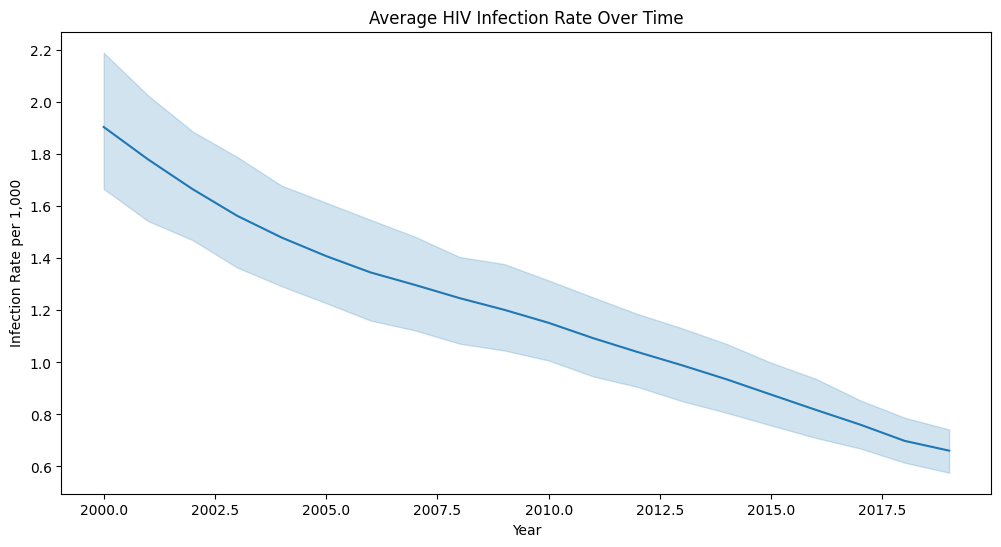

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="Year", y="HIV_Infection_Rate")
plt.title("Average HIV Infection Rate Over Time")
plt.ylabel("Infection Rate per 1,000")
plt.show()

From the lineplot we can see the HIV infection rate is falling over the years

B. TREND BY SEX


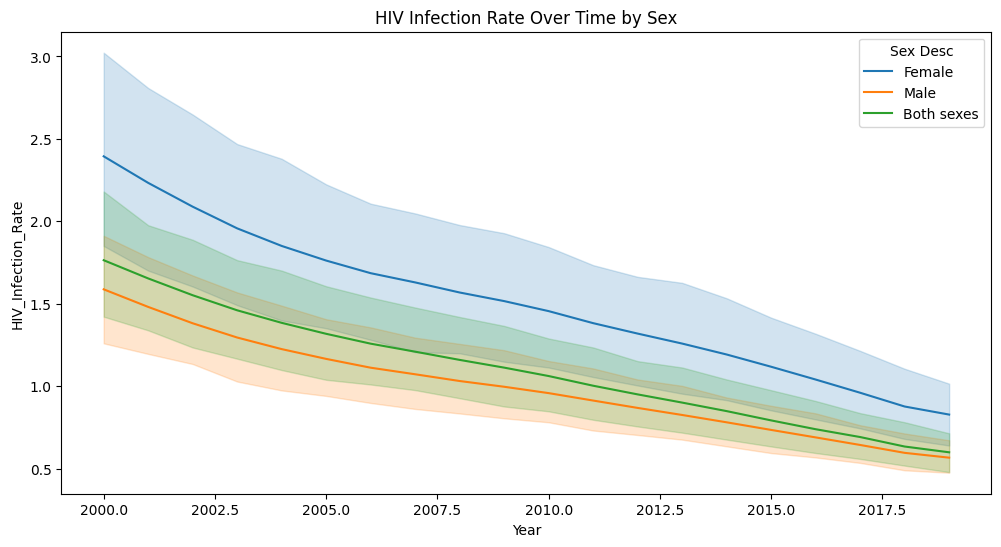

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x="Year", y="HIV_Infection_Rate", hue="Sex Desc")
plt.title("HIV Infection Rate Over Time by Sex")
plt.show()


Generally females are aaffected more by HIV prevalence as from the graph.

C. BOXPLOT TO SPOT OUTLIERS

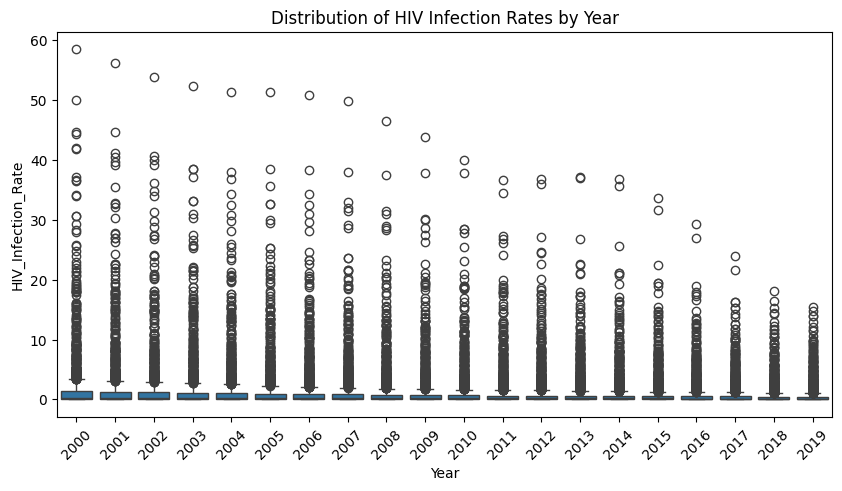

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x="Year", y="HIV_Infection_Rate")
plt.xticks(rotation=45)
plt.title("Distribution of HIV Infection Rates by Year")
plt.show()


Over the years especially the last quarter we can see the gap between the outliers and the normal infection rate is not as much which makes it somehow easier to forecast about the coming years.

D. HEATMAP (Grouped Mean Table)

<Axes: xlabel='Sex Desc', ylabel='Year'>

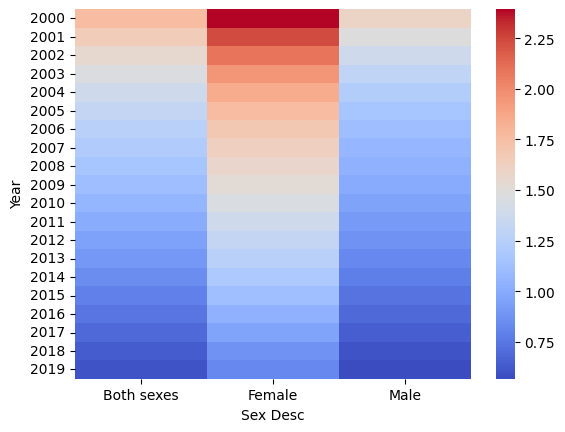

In [ ]:
df_pivot = df_clean.pivot_table(index="Year", columns="Sex Desc", values="HIV_Infection_Rate", aggfunc="mean")
sns.heatmap(df_pivot, cmap="coolwarm")


Darker color = higher value
Lighter color = Lower value

STEP 4: TIME SERIES MODEL BUILDING

A. Import time series model

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Creating a new dataframe just for Prophet
df_prophet = df_clean[["Year", "HIV_Infection_Rate"]].copy()

# Prophet expects the datetime column to be called 'ds'
df_prophet.rename(columns={"Year": "ds", "HIV_Infection_Rate": "y"}, inplace=True)

# Converting 'ds' to datetime format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")


In [ ]:
#initializing and fitting the model
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzh8xopm/5t0scmmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzh8xopm/19ez8kjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49897', 'data', 'file=/tmp/tmpfzh8xopm/5t0scmmw.json', 'init=/tmp/tmpfzh8xopm/19ez8kjj.json', 'output', 'file=/tmp/tmpfzh8xopm/prophet_modelnmr0_v4s/prophet_model-20250617112531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:25:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Telling future how far into my future i want my predictions
future = model.make_future_dataframe(periods=7, freq="Y")  # 7 more years


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [ ]:
forecast = model.predict(future)


Visualizing the forecast

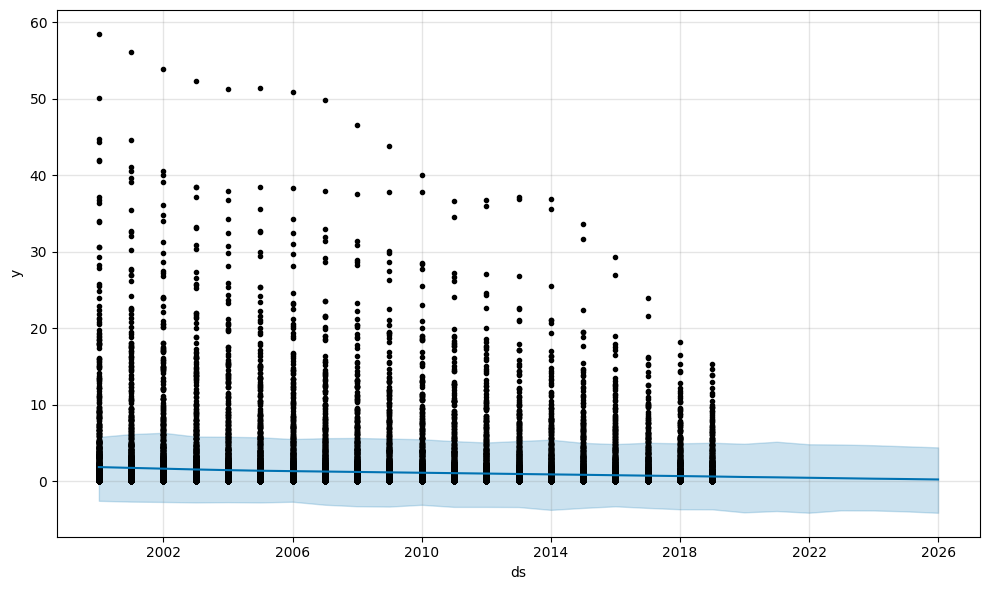

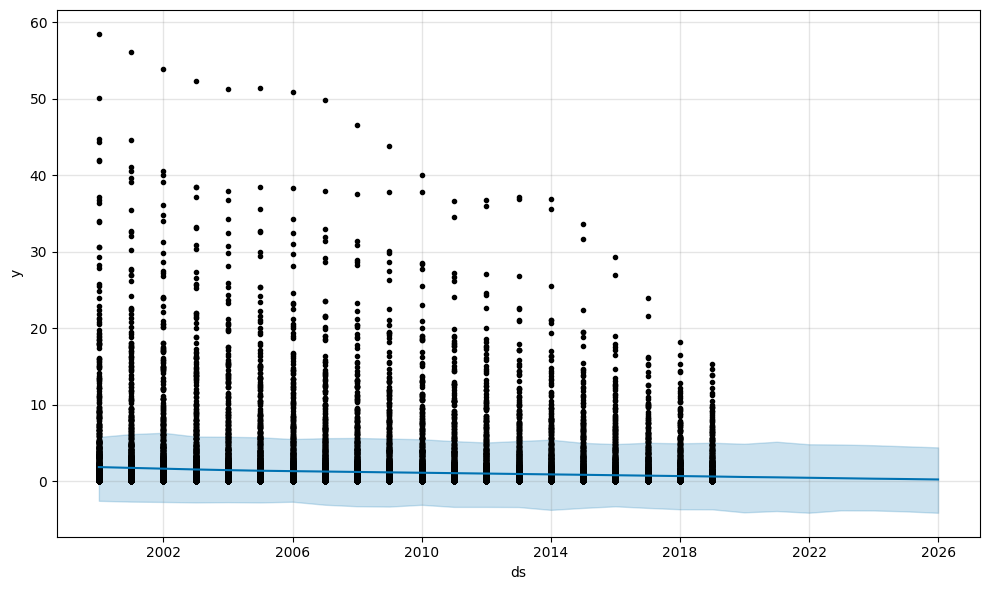

In [ ]:
model.plot(forecast)


From 2019 onward, the blue trend line levels off and remains relatively stable.

This indicates a plateau in new infection rates rather than continued decline.

The shaded blue area (the confidence interval) is narrow — meaning the model is confident about the stability of predictions.

The HIV infection rate has shown a clear declining trend from 2000 to 2018. Forecasts from 2019 to 2026 suggest a stabilization in infection rates, indicating sustained progress but not full eradication. Interventions seem effective but should continue, especially in areas previously reporting extreme rates

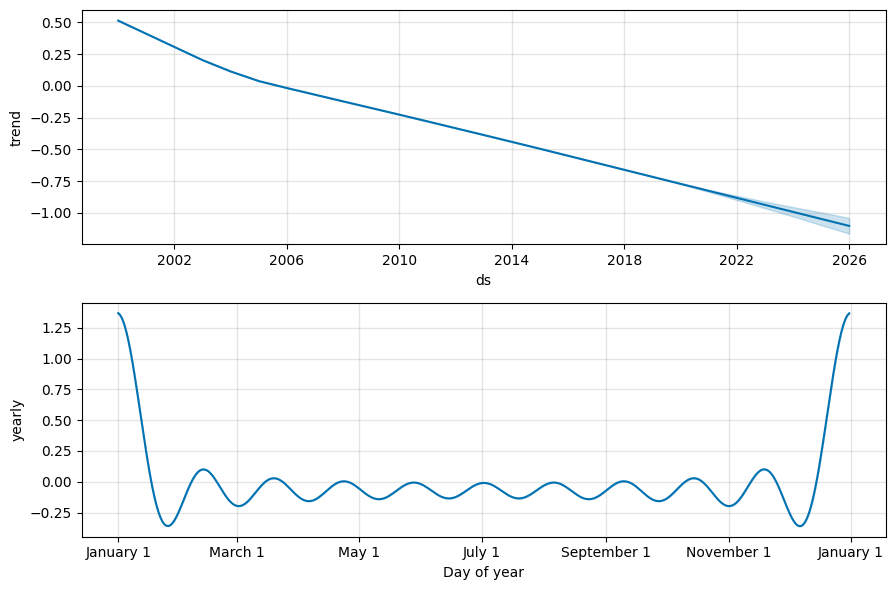

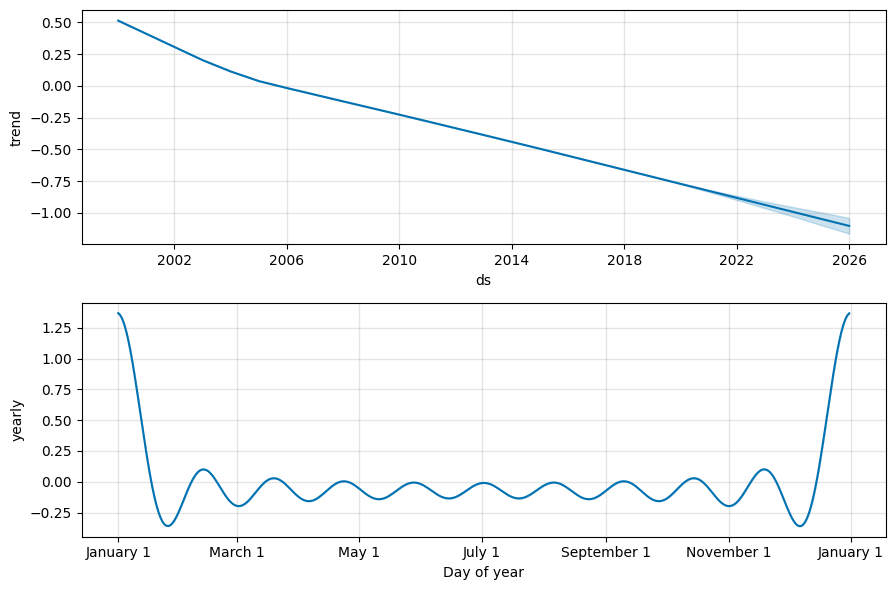

In [ ]:
model.plot_components(forecast)


STEP 5: MODEL EVALUATION

Checking for the model accuracy
First ill split the data into:

Training set: earlier years (e.g., 2000–2015)

Test set: recent years (e.g., 2016–2019)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
# STEP 1: Prepare data for Prophet
df_prophet = (
    df_clean
    .groupby("Year")["HIV_Infection_Rate"]
    .mean()
    .reset_index()
    .rename(columns={"Year": "ds", "HIV_Infection_Rate": "y"})
)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")



In [ ]:
# STEP 2: Train-test split
train = df_prophet[df_prophet["ds"].dt.year <= 2015]
test  = df_prophet[df_prophet["ds"].dt.year >  2015]


In [ ]:
# STEP 3: Fit the model on training data
model = Prophet()
model.fit(train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzh8xopm/jaa4mbe8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfzh8xopm/vfu2ywvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2323', 'data', 'file=/tmp/tmpfzh8xopm/jaa4mbe8.json', 'init=/tmp/tmpfzh8xopm/vfu2ywvg.json', 'output', 'file=/tmp/tmpfzh8xopm/prophet_model0qzwh7b2/prophet_model-20250617125448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# STEP 4: Make future dataframe for test years
future = model.make_future_dataframe(periods=len(test), freq='Y')
forecast = model.predict(future)


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [48]:
# STEP 5: Extract forecast for test years
common_years = sorted(set(test["ds"].dt.year).intersection(set(forecast["ds"].dt.year)))

# Filter both to only common years
test_common = test[test["ds"].dt.year.isin(common_years)]
forecast_common = forecast[forecast["ds"].dt.year.isin(common_years)]

# Compare
y_true = test_common["y"].values
y_pred = forecast_common["yhat"].values

In [49]:
# STEP 6: Calculate error metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.0355
Root Mean Squared Error (RMSE): 0.0373


Both MAE and RMSE are very low, which indicates that the model is doing a great job predicting HIV infection rates.